# Практическая работа №3: Статистический анализ диад

Выполнил студент гр. 3385 Савранский Данила Сергеевич. Вариант №11.

## Цель работы

Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

### 1. Индекс взаимности Каца-Пауэла

Индекс взаимности Каца-Пауэла измеряет склонность акторов к двусторонним связям в сети.  
Он рассчитывается в двух случаях:


Фиксированный выбор акторов $d$ (каждый актор делает фиксированное число выборов):
$$
r_f = \frac{2 (g - 1) M - g d^2}{g d (g - 1 - d)}
$$
где:

$g$ - число акторов (вершин сети),

$M$ - наблюдаемое число дуг (ориентированных связей),

    
Свободный выбор акторов (исходящие степени могут различаться):
$$
r_s = \frac{2(g-1)^2 M - L^2 + L_2}{L (g-1)^2 - L_2}
$$
где:

$L = M$ - общее число дуг,

$L_2 = \sum_{i=1}^{g} x_i^2$ - сумма квадратов исходящих степеней акторов.



### 2. Индекс взаимности Бондопаддхая

Индекс Бондопаддхая учитывает ограничения, накладываемые распределением степеней вершин:

$$
R_B = \frac{M - M_{\min}}{M_{\max} - M_{\min}}
$$

где:

$M$ - наблюдаемое число взаимных дуалей ,

$M_{\min}$ - минимально возможное число взаимных дуалей,

$M_{\max}$ - максимально возможное число взаимных дуалей.

## Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

1. С помощью библиотеки igraph смоделировать случайный орграф 𝒢𝑑 на основе модели Эрдеша—Реньи в зависимости от номера варианта: 𝒢𝑑 = G(𝑔, 𝑝),
  
где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами

Вариант 11: 𝑔 = 102, 𝑝 = 0,60 

In [2]:
library(igraph)

In [12]:
g <- 102   
p <- 0.60

set.seed(42)  

Gd <- sample_gnp(n = g, p = p, directed = TRUE,  loops = FALSE)

2. Отобразить полученный орграф

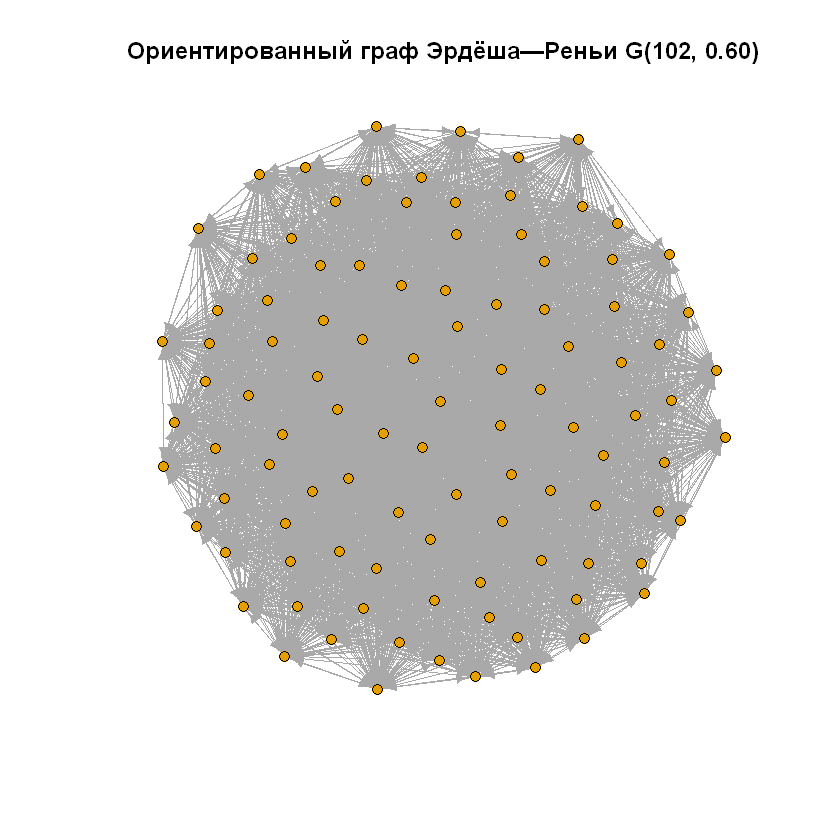

In [22]:
plot(Gd, layout = layout_with_fr, vertex.size = 4, vertex.label = NA, edge.arrow.size = 0.5, main = "Ориентированный граф Эрдёша—Реньи G(102, 0.60)"
)

3. Вычислить «пятичисловую сводку» для графа 𝒢𝑑

In [27]:
n <- vcount(Gd)
m <- ecount(Gd)

cat("Размер сети:", n, "\n")

cat("Плотность сети:", m / (n * (n - 1)), "\n")

comp <- components(Gd)

cat("Число компонент:", comp$no, "\n")

diam <- diameter(Gd, directed = TRUE)
cat("Диаметр сети:", diam, "\n")

clust <- transitivity(Gd)
cat("Коэффициент кластеризации:", clust, "\n")

Размер сети: 102 
Плотность сети: 0.6018249 
Число компонент: 1 
Диаметр сети: 2 
Коэффициент кластеризации: 0.8423166 


4. Вычислить цензус диад. Сделать выводы.

In [38]:
dyad <- dyad_census(Gd)

Nd <- choose(n, 2)

cat("Взаимные диады:", dyad$mut, "Относительное значение:", round(dyad$mut / Nd, 2), "Теор. значение:", p*p, "\n")
cat("Асимметричные диады:", dyad$asym, "Относительное значение:", round(dyad$asym / Nd, 2), "Теор. значение:", 2*p*(1-p), "\n")
cat("Пустые диады:", dyad$null, "Относительное значение:", round(dyad$null / Nd, 2), "Теор. значение:", (1-p)*(1-p), "\n")


Взаимные диады: 1860 Относительное значение: 0.36 Теор. значение: 0.36 
Асимметричные диады: 2480 Относительное значение: 0.48 Теор. значение: 0.48 
Пустые диады: 811 Относительное значение: 0.16 Теор. значение: 0.16 


Значение диад в сети совпадает с ожидаемым

5. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

In [62]:
M <- dyad$mut
d <- g * p

r_fixed <- (2*(g - 1)*M - g*d*d) / (g*d*(g - 1 - d))
cat("Индекс взаимности Каца—Пауэла при фиксированом выборе:", r_fixed, "\n")

out_deg <- degree(Gd, mode = "out")

m  <- sum(out_deg)
L2 <- sum(out_deg^2)

r_free <- (2*M*(g - 1)^2 - m^2 + L2) / (m*(g - 1)^2 - L2)
cat("Индекс взаимности Каца—Пауэла при свободном выборе", r_free)

Индекс взаимности Каца—Пауэла при фиксированом выборе: -0.02541736 
Индекс взаимности Каца—Пауэла при свободном выборе -0.001799956

Сеть практически не отличается от полностью случайной по этим показателям.

6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [63]:
m_fixed <- (d / (g - 1)) * ((d / (g - 1)) + r_fixed * (g - d - 1) / (g - 1))
cat("Вероятность взаимной связи с фиксированным d:", m_fixed, "\n")
m_free <- (m / (g * (g - 1))) * ((m / (g * (g - 1)))  + r_free * (1 - (m / (g * (g - 1)))))
cat("Вероятность взаимной связи без фиксированного d:", m_free, "\n")

Вероятность взаимной связи с фиксированным d: 0.3610949 
Вероятность взаимной связи без фиксированного d: 0.3617619 


7. Вычислить индекс взаимности Бондопаддхая.

In [64]:
out_deg <- degree(Gd, mode = "out")
in_deg  <- degree(Gd, mode = "in")

M_max <- sum(pmin(out_deg, in_deg))
M_min <- sum(pmax(0, out_deg + in_deg - (g - 1)))

R_B <- (2*M - M_min) / (M_max - M_min)
R_B


[1] 0.4267298

8. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе 𝒢𝑑 имеет биномиальное распределение Binom(𝑔(𝑔 − 1)/2, 1/2) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [79]:
alpha <- 0.02   
p0_1 <- 0.5     
p0_2 <- 0.51    

n <- g * (g - 1)

test <- binom.test(m, n, p0_1, alternative = "two.sided")
cat("p-значение теста:", test$p.value, "\n")
cat("Заданный уровень значимости alpha:", alpha, "\n")

if (test$p.value > alpha) {
  cat("Результат: Нулевая гипотеза не отвергается.\n")
} else {
  cat("Результат: Нулевая гипотеза отвергается.\n")
}

p-значение теста: 1.760227e-95 
Заданный уровень значимости alpha: 0.02 
Результат: Нулевая гипотеза отвергается.


9. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе 𝒢𝑑 имеет биномиальное распределение Binom(𝑔(𝑔 − 1)/2, 𝑃0) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [87]:
test <- binom.test(m, n, p0_2, alternative = "two.sided")
cat("p-значение теста:", test$p.value, "\n")
cat("Заданный уровень значимости alpha:", alpha, "\n")

if (test$p.value > alpha) {
  cat("Результат: Нулевая гипотеза не отвергается.\n")
} else {
  cat("Результат: Нулевая гипотеза отвергается.\n")
}

p-значение теста: 3.619732e-78 
Заданный уровень значимости alpha: 0.02 
Результат: Нулевая гипотеза отвергается.


In [88]:
ci_test <- binom.test(m, n, conf.level = 1 - alpha)

cat("Оценка вероятности появления дуги p_hat:", m / n, "\n")
cat((1 - alpha)*100, "% доверительный интервал для p: [", ci_test$conf.int[1], ",", ci_test$conf.int[2], "]\n")

# Выводы
if (ci_test$conf.int[1] <= p & ci_test$conf.int[2] >= p) {
  cat("Вывод: значение p =", p, "находится внутри доверительного интервала.\n")
} else {
  cat("Вывод: значение p =", p, "находится вне доверительного интервала.\n")
}

Оценка вероятности появления дуги p_hat: 0.6018249 
98 % доверительный интервал для p: [ 0.5905191 , 0.6130523 ]
Вывод: значение p = 0.6 находится внутри доверительного интервала.


## Выводы

В ходе работы был проведён статистический анализ случайно смоделированного ориентированного графа с использованием модели Эрдеша—Реньи. Были рассчитаны  цензус диад и индексы взаимности, а также проверены гипотезы о биномиальном распределении числа дуг и построен доверительный интервал для вероятности появления дуги.